In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from collections import defaultdict

In [4]:
from source.tokeniser import load_tokeniser_from_rsmiles
print("Building tokeniser...")
tokeniser = load_tokeniser_from_rsmiles("data/USPTO_50K_PtoR_aug20")
print("Finished tokeniser.")

Building tokeniser...
Chemistry tokens start at index 6
Finished tokeniser.


In [5]:
chains = np.load('ForwardDiffusionEval_sample_chains.npy')
print(chains.shape)

(10, 1000, 64)


In [6]:
true_smiles, sample_chains = chains[:, 0], chains[:, 1:]
true_smiles = true_smiles.flatten()
sample_chains = sample_chains.transpose(1, 0, 2).reshape((999, -1))

In [7]:
tokens = tokeniser.tokenise(true_smiles[:10])['original_tokens']
print(tokens)

token_ids = tokeniser.convert_tokens_to_ids(tokens)
print(token_ids)

print(tokeniser.tokenise(['<MASK><PAD><SEP>']))

[['^', 'c', '1', 'c', '(', 'C', 'N', 'C', '(', 'C', '2', '3', 'C', 'C', '4', 'C', 'C', '(', 'N', 'C', '(', '=', 'O', ')', 'C', ')', '(', 'C', 'C', '(', 'C', '2', ')', 'C', '4', ')', 'C', '3', ')', '=', 'O', ')', 'c', 'c', 'c', '(', 'C', '(', 'N', 'c', '2', 'c', '(', 'N', ')', 'c', 'c', 'c', 'c', '2', ')', '=', 'O', ')', 'c', '1', '&'], ['^', 'O', '(', 'C', 'C', 'C', 'S', '(', 'C', ')', '(', '=', 'O', ')', '=', 'O', ')', 'c', '1', 'c', 'c', 'c', '(', '/', 'C', '=', 'C', '/', 'C', '(', 'O', ')', '=', 'O', ')', 'c', '(', 'O', 'c', '2', 'c', '(', 'Cl', ')', 'c', 'c', '(', 'C', '(', 'F', ')', '(', 'F', ')', 'F', ')', 'c', 'n', '2', ')', 'c', '1', '&'], ['^', 'c', '1', '(', 'Br', ')', 'c', 'c', 'c', '(', 'F', ')', 'c', '(', 'C', '(', '=', 'O', ')', 'N', '(', 'C', ')', 'C', ')', 'c', '1', '&'], ['^', 'C', '1', 'C', 'C', '(', 'C', 'N', 'C', '(', 'c', '2', 'c', '(', 'O', 'C', ')', 'c', '(', 'C', '(', 'O', 'C', ')', '=', 'O', ')', 'c', '(', 'C', '(', 'O', 'C', ')', '=', 'O', ')', 's', '2', ')', 

In [27]:
frequencies = []
for t in range(0, len(sample_chains), 1):    
    frequency_dict = defaultdict(int)
    tokens = tokeniser.tokenise(sample_chains[t])['original_tokens']
    for sample in tokens:
        for ch in sample:
            frequency_dict[ch] += 1
    frequencies.append((t, frequency_dict))

In [30]:
true_frequencies = defaultdict(int)
for sample in tokeniser.tokenise(true_smiles)['original_tokens']:
    for ch in sample:
        true_frequencies[ch] += 1

In [35]:
last_frequencies = frequencies[-1][-1]
true_totals, last_totals = sum(true_frequencies.values()), sum(last_frequencies.values())
for ch in sorted(last_frequencies, key=lambda x: true_frequencies[x], reverse=True):
    print(f'{ch.rjust(6)}: {true_frequencies[ch]/true_totals:.3f} vs. {last_frequencies[ch]/last_totals:.3f}')

     c: 0.242 vs. 0.217
     C: 0.158 vs. 0.144
     (: 0.120 vs. 0.107
     ): 0.120 vs. 0.107
     1: 0.056 vs. 0.048
     O: 0.055 vs. 0.050
     2: 0.044 vs. 0.043
     =: 0.032 vs. 0.029
     N: 0.030 vs. 0.027
     n: 0.024 vs. 0.022
     ^: 0.021 vs. 0.019
     &: 0.021 vs. 0.019
     3: 0.020 vs. 0.019
     F: 0.012 vs. 0.011
     -: 0.007 vs. 0.006
     4: 0.007 vs. 0.005
    Cl: 0.006 vs. 0.005
     S: 0.004 vs. 0.003
 [C@H]: 0.003 vs. 0.003
[C@@H]: 0.003 vs. 0.002
    Br: 0.002 vs. 0.002
     #: 0.002 vs. 0.002
     o: 0.002 vs. 0.002
     s: 0.002 vs. 0.001
  [nH]: 0.002 vs. 0.001
  [O-]: 0.001 vs. 0.001
     5: 0.001 vs. 0.001
  [N+]: 0.001 vs. 0.001
     /: 0.001 vs. 0.001
 [C@@]: 0.000 vs. 0.000
  [Si]: 0.000 vs. 0.000
  [C@]: 0.000 vs. 0.000
     I: 0.000 vs. 0.000
     6: 0.000 vs. 0.000
     \: 0.000 vs. 0.000
  [n+]: 0.000 vs. 0.000
     P: 0.000 vs. 0.000
  [N-]: 0.000 vs. 0.000
     ?: 0.000 vs. 0.098
[SiH2]: 0.000 vs. 0.000


In [28]:
t, freq_maps = zip(*frequencies)

#collapse freq_maps
plotable_freqs = defaultdict(lambda: np.zeros(len(freq_maps)))
for i, fmap in enumerate(freq_maps):
    for ch, count in fmap.items():
        plotable_freqs[ch][i] = count

plotable_freqs = dict(plotable_freqs)

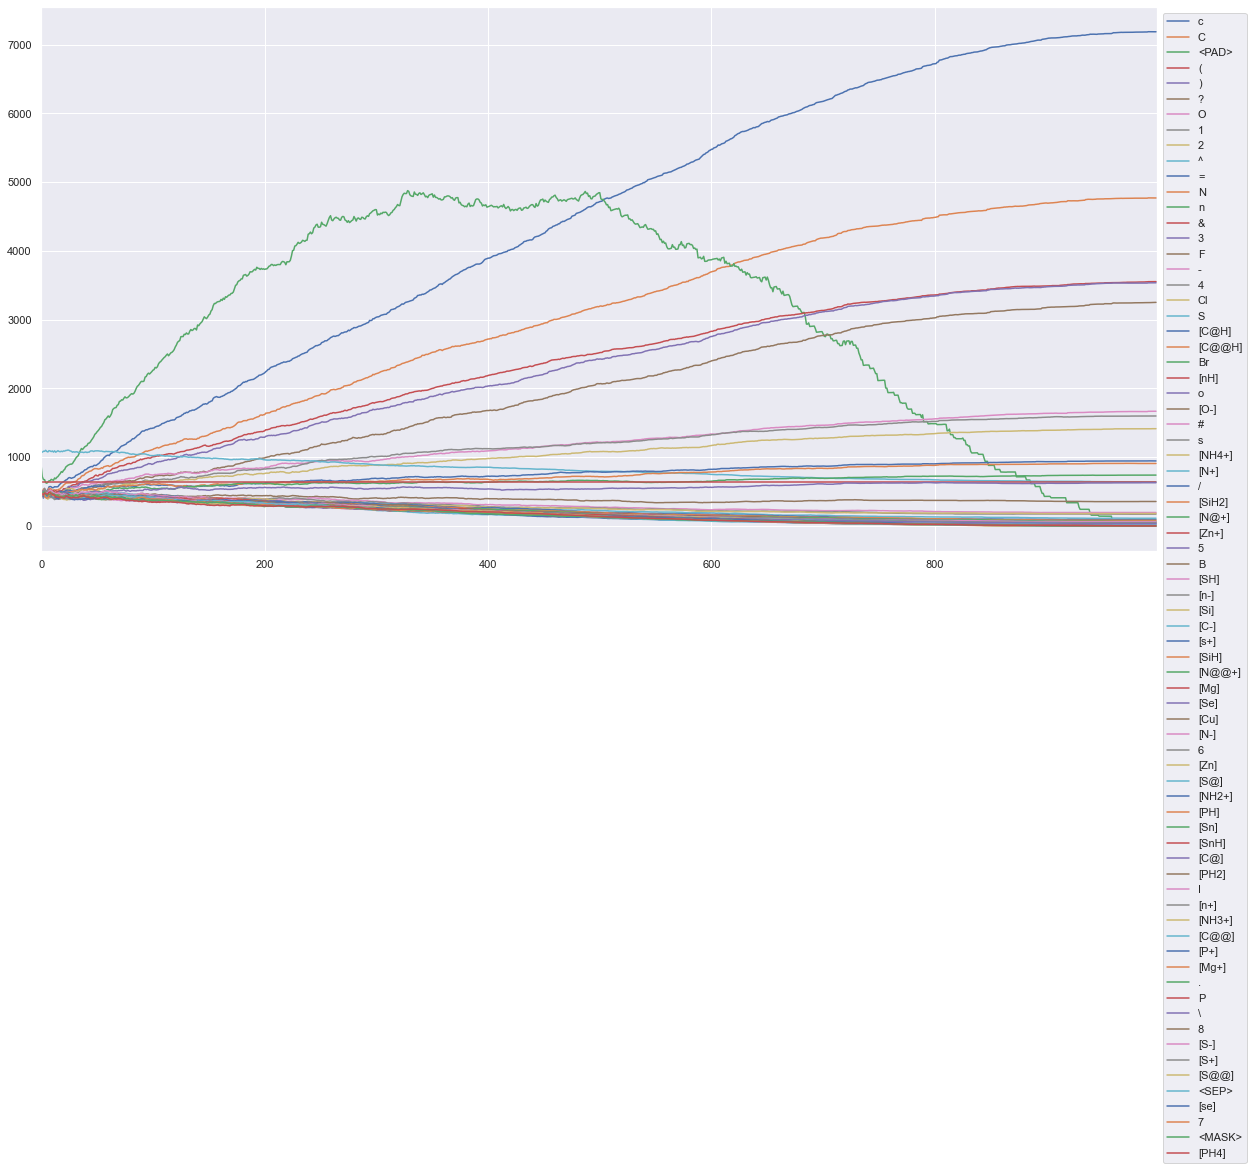

In [29]:
plt.figure(figsize=(20, 10))
for ch, counts in sorted(plotable_freqs.items(), key=lambda x: plotable_freqs[x[0]].sum(), reverse=True):
    plt.plot(t, counts, label=ch)

plt.xlim(0, 999)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [36]:
from rdkit import Chem, RDLogger
RDLogger.DisableLog("rdApp.*")

In [45]:
sampled_smiles = sample_chains[-1]
sampled_smiles = [s.rstrip('?') for s in sampled_smiles]

mol_targets = [Chem.MolFromSmiles(smi) for smi in true_smiles]
canon_targets = [Chem.MolToSmiles(mol) for mol in mol_targets]

sampled_mols = [Chem.MolFromSmiles(smi) for smi in sampled_smiles]
invalid = [mol is None for mol in sampled_mols]

canon_smiles = ["Unknown" if mol is None else Chem.MolToSmiles(mol) for mol in sampled_mols]
correct_smiles = [canon_targets[idx] == smi for idx, smi in enumerate(canon_smiles)]

num_correct = sum(correct_smiles)
total = len(correct_smiles)
num_invalid = sum(invalid)
perc_invalid = num_invalid / total
accuracy = num_correct / total

print(perc_invalid)
print(accuracy)

0.7046875
0.1796875


In [46]:
for i, (true_smi, sample_smi) in enumerate(zip(true_smiles, sampled_smiles)):
    if i > 20:
        break
    
    print(f'  True: {true_smi}')
    print(f'Sample: {sample_smi} ({"invalid" if invalid[i] else "valid"}, {"correct" if correct_smiles[i] else "incorrect"})')

  True: c1c(CNC(C23CC4CC(NC(=O)C)(CC(C2)C4)C3)=O)ccc(C(Nc2c(N)cccc2)=O)c1
Sample: C(NC12CC3(C(NCc3ccc(C(Nc4ccccc4NO)=O)cc3)=O)CC3CC(C2)C1)CC(C3)C2 (invalid, incorrect)
  True: O(CCCS(C)(=O)=O)c1ccc(/C=C/C(O)=O)c(Oc2c(Cl)cc(C(F)(F)F)cn2)c1
Sample: c1c/C=C/C2OO)c(Oc2c(Cl)cc(C(F)(F)F)cn2)cc(OCCC/)CS(=O)(C)=O (invalid, incorrect)
  True: c1(Br)ccc(F)c(C(=O)N(C)C)c1
Sample: N(C)(C)C(c1c(F)ccc(Br)c1)=O (valid, correct)
  True: C1CC(CNC(c2c(OC)c(C(OC)=O)c(C(OC)=O)s2)=O)N(CC)C1
Sample: O(C(c1c(OC)c(C(=O)c2C(=O)OC)N(C(=O)OCCO)1cNCC1)CC (invalid, incorrect)
  True: c1(F)cccc(C(NCC2(c3cnc(C)nc3)CCOCC2)=O)c1Cl
Sample: C1(COC(C(c2cnc(C)nc2)CNC(c2c(Cl)c(F)cc2)=O)C1 (invalid, incorrect)
  True: c1c(OCCCCl)ccc(C(=O)N)c1
Sample: C(N)(c1ccc(OCCCCl)cc1)=O (valid, correct)
  True: c1nc2c(c(Nc3cc4cn[nH]c4cc3OCC)n1)c1c(s2)CC(C(N(C)CCOC)=O)CC1
Sample: C1Cc2c3c3ncnc2Nc2c(OCC)cc4[nH])ccc5)c3CC1C(=O)N(C)CCOC)C (invalid, incorrect)
  True: C1CN(c2ccccn2)CCCN1
Sample: N1(c2ncccc2)CCCNCC1 (valid, correct)
  True: 